<a href="https://colab.research.google.com/github/Mathumitha2561/ML-lab/blob/main/1818137_ML__EXP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Decision tree Classification: For the Titanic dataset from kaggle guess whether the individuals from the dataset had survived or not. Also calulate the gini index

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

PREPARE THE DATA 

In [ ]:
data = pd.read_csv('train.csv', index_col='PassengerId')
print(data.head())

             Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S

[5 rows x 11 columns]


In [ ]:
data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]


In [ ]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [ ]:
data = data.dropna()

TRAIN THE MODEL

In [ ]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

BUILD THE MODEL

In [ ]:
model = tree.DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

PREDICTION

In [ ]:
y_predict = model.predict(x_test)
accuracy_score(y_test, y_predict)

0.8212290502793296

In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=[' Not Survival', ' Survival'],
    index=['True Not Survival', 'True Survival']
)

,Not Survival,Survival
True Not Survival,97,15
True Survival,17,50


GINI INDEX

In [ ]:
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    random_observation_survived_prob = survival_prob
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survided_prob = not_survival_prob * random_observation_survived_prob
    mislabelling_not_survided_prob = survival_prob * random_observation_not_survived_prob
    gini_impurity = mislabelling_survided_prob + mislabelling_not_survided_prob
    return gini_impurity

In [ ]:
gini_impurity_starting_node = get_gini_impurity(342, 891)
gini_impurity_starting_node

0.47301295786144265

In [ ]:
gini_impurity_men = get_gini_impurity(109, 577)
gini_impurity_men

0.3064437162277843

In [ ]:
gini_impurity_women = get_gini_impurity(233, 314)
gini_impurity_women

0.3828350034484158

VISUALIZATION

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


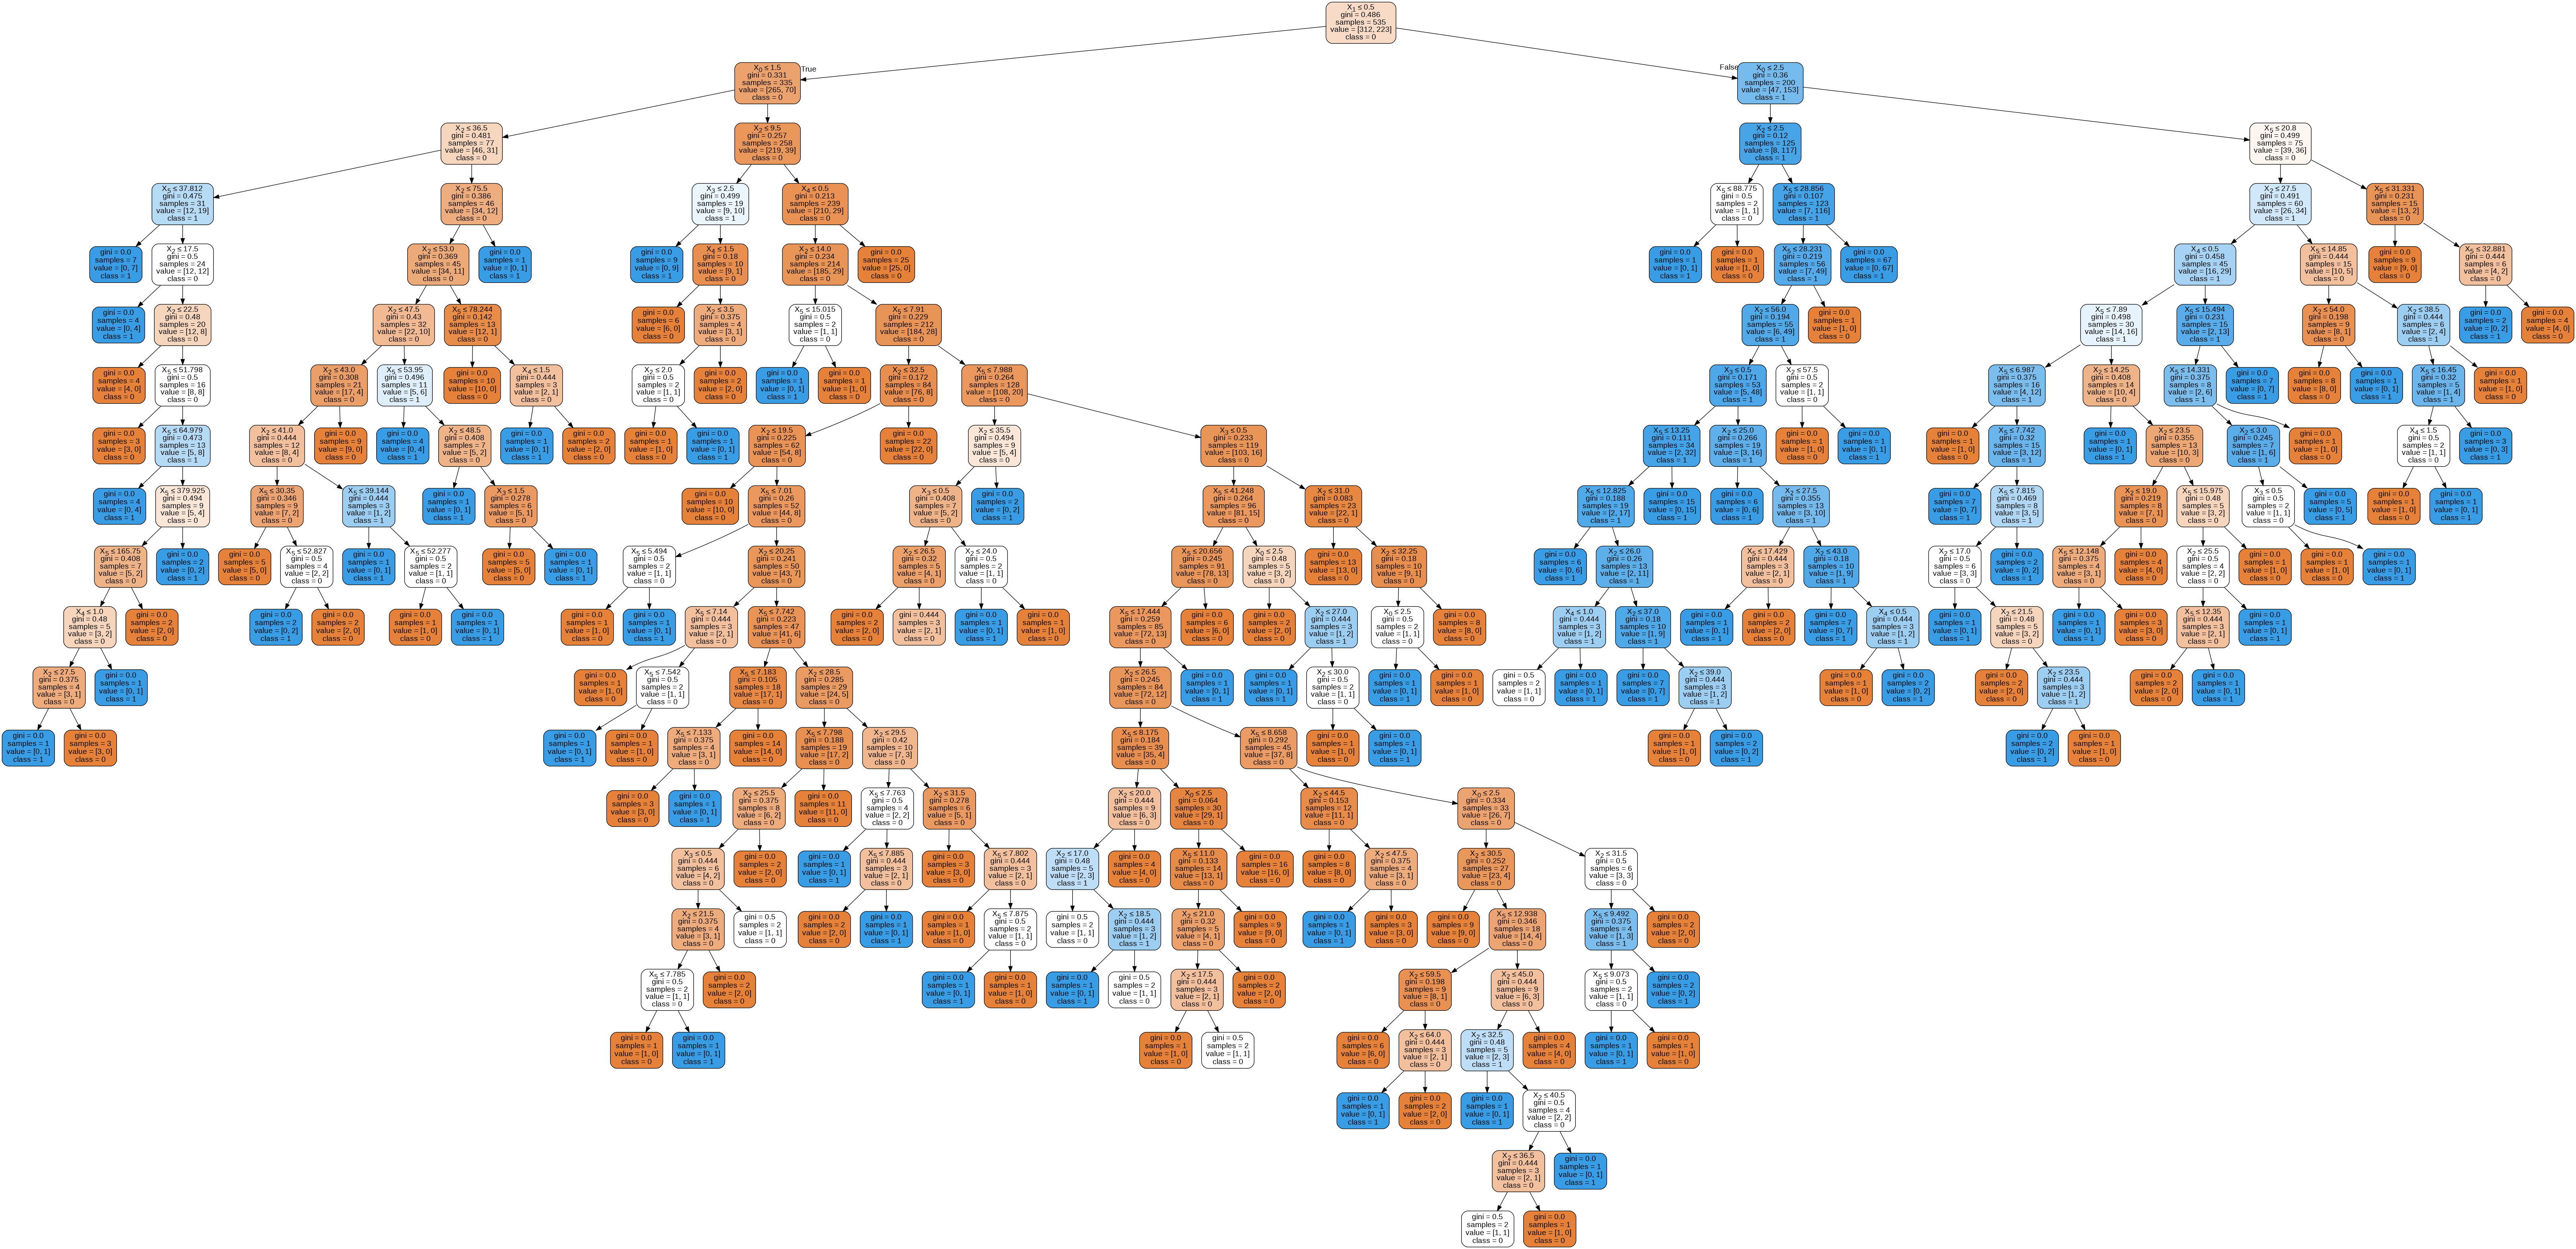

In [ ]:
from IPython.display import Image as Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(model,out_file=dot_data,filled=True,rounded=True,special_characters=True,
              class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())